In [2]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?

In [1]:
flat_price = 120000

In [3]:
flat_price_incr_rate_per_annum = 0.05

In [4]:
number_of_years = 5

In [7]:
flat_price_in_5_years = -round(npf.fv(flat_price_incr_rate_per_annum, number_of_years, 0, flat_price, when='end'))
flat_price_in_5_years

153154

In [75]:
print(f'Cena mieszkania po {number_of_years} latach - {flat_price_in_5_years} PLN')

Cena mieszkania po 5 latach - 153154 PLN


In [9]:
freq = 12
rate = 0.12
years = number_of_years
pv = flat_price_in_5_years

In [10]:
rate /= freq  # konwersja stopy do okresu miesięcznego
nper = years * freq  # liczba wszystkich okresów

In [11]:
pmt = -round(npf.pmt(rate, nper, 0, fv=flat_price_in_5_years, when='end')) # round(npf.pmt(rate, nper, flat_price_in_5_years, when='end'))
print(f'Stała wplata przez {number_of_years} lat - {pmt} PLN')

Stała wplata przez 5 lat - 1875 PLN


In [31]:
periods = np.arange(1,nper+1,dtype=int)
periods

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [13]:
x2 = periods

In [29]:
# numpy_financial.ipmt(rate, per, nper, pv, fv=0, when='end')
interest_portion = np.round(npf.ipmt(rate, periods, nper, 0, flat_price_in_5_years, 'end'))
interest_portion

array([ -19.,   -0.,   19.,   38.,   57.,   76.,   96.,  115.,  135.,
        155.,  176.,  196.,  217.,  238.,  259.,  280.,  302.,  324.,
        346.,  368.,  390.,  413.,  436.,  459.,  482.,  506.,  530.,
        554.,  578.,  603.,  627.,  652.,  678.,  703.,  729.,  755.,
        781.,  808.,  835.,  862.,  889.,  917.,  945.,  973., 1001.,
       1030., 1059., 1089., 1118., 1148., 1178., 1209., 1240., 1271.,
       1302., 1334., 1366., 1399., 1431., 1464., 1498.])

In [30]:
capital = interest_portion + pmt
capital

array([1856., 1875., 1894., 1913., 1932., 1951., 1971., 1990., 2010.,
       2030., 2051., 2071., 2092., 2113., 2134., 2155., 2177., 2199.,
       2221., 2243., 2265., 2288., 2311., 2334., 2357., 2381., 2405.,
       2429., 2453., 2478., 2502., 2527., 2553., 2578., 2604., 2630.,
       2656., 2683., 2710., 2737., 2764., 2792., 2820., 2848., 2876.,
       2905., 2934., 2964., 2993., 3023., 3053., 3084., 3115., 3146.,
       3177., 3209., 3241., 3274., 3306., 3339., 3373.])

In [34]:
x=[0,60]
y = [flat_price,flat_price_in_5_years]

Text(0, 0.5, 'Skumulowana wartość lokaty')

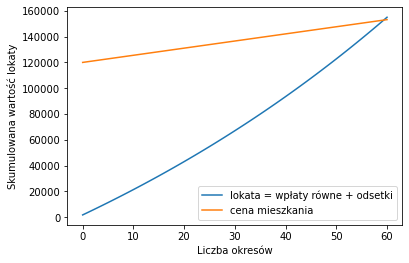

In [36]:
plt.plot(capital.cumsum(), label="lokata = wpłaty równe + odsetki")
plt.plot(x, y,label="cena mieszkania")
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Skumulowana wartość lokaty')